In [56]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [57]:
df = pd.read_csv("Data/test_data.csv")

In [58]:
df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df.set_index("DateTime")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220000 entries, 2019-04-14 00:00:00 to 2019-04-16 07:33:19
Data columns (total 26 columns):
CurrentSpeed    219833 non-null float64
CurrentDir      219832 non-null float64
TWS             219837 non-null float64
TWA             219833 non-null float64
AWS             219834 non-null float64
AWA             219838 non-null float64
Roll            219833 non-null float64
Pitch           219836 non-null float64
HeadingMag      219835 non-null float64
HoG             219838 non-null float64
HeadingTrue     219837 non-null float64
AirTemp         219840 non-null float64
Longitude       219836 non-null float64
Latitude        219840 non-null float64
SoG             219842 non-null float64
SoS             219840 non-null float64
AvgSoS          219838 non-null float64
VMG             219837 non-null float64
RudderAng       219838 non-null float64
Leeway          219839 non-null float64
TWD             219838 non-null float64
WSoG           

In [60]:
df.head()

CurrentSpeed  CurrentDir   TWS   TWA   AWS   AWA  Roll  \
DateTime                                                                      
2019-04-14 00:00:00        0.0756       123.0  10.8  48.0  10.4  48.0 -3.54   
2019-04-14 00:00:01        0.0756       123.0  10.8  48.0  10.4  48.0 -3.54   
2019-04-14 00:00:02        0.0756       123.0  10.8  48.0  10.4  48.0 -3.52   
2019-04-14 00:00:03        0.0756       123.0  10.8  48.0  10.4  48.0 -3.52   
2019-04-14 00:00:04        0.0756       123.0  10.8  48.0  10.4  48.0 -3.50   

                        Pitch  HeadingMag    HoG  ...  AvgSoS     VMG  \
DateTime                                          ...                   
2019-04-14 00:00:00  9.080000        24.0  308.0  ...  0.0864  0.0594   
2019-04-14 00:00:01  9.080000        24.0  308.0  ...  0.0864  0.0594   
2019-04-14 00:00:02  9.099999        24.0  308.0  ...  0.0864  0.0594   
2019-04-14 00:00:03  9.099999        24.0  308.0  ...  0.0864  0.0594   
2019-04-14 00:00:04  9.099999        24.0  308.0  ...  0.0864  0.0594   

                     RudderAng  Leeway    TWD  WSoG  VoltageDrawn  ModePilote  \
DateTime                                                                        
2019-04-14 00:00:00   4.666667     0.0  356.0  10.5          11.8         5.0   
2019-04-14 00:00:01   4.666667     0.0  356.0  10.5          11.8         5.0   
2019-04-14 00:00:02   4.666667     0.0  356.0   9.9          11.8         5.0   
2019-04-14 00:00:03   4.666667     0.0  356.0   9.9          11.8         5.0   
2019-04-14 00:00:04   4.666667     0.0  356.0  10.3          11.8         5.0   

                       Yaw  Tacking  
DateTime                             
2019-04-14 00:00:00 -299.0      1.0  
2019-04-14 00:00:01 -299.0      1.0  
2019-04-14 00:00:02 -299.0      1.0  
2019-04-14 00:00:03 -299.0      1.0  
2019-04-14 00:00:04 -299.0      1.0  

[5 rows x 26 columns]

In [61]:
df.tail()

CurrentSpeed  CurrentDir   TWS   TWA        AWS   AWA  \
DateTime                                                                     
2019-04-16 07:33:15        1.7496       103.0  14.6  56.0  21.100000  33.0   
2019-04-16 07:33:16        1.7496       101.0  14.7  58.0  20.500000  37.0   
2019-04-16 07:33:17        1.8576       100.0  14.5  60.0  20.299999  37.0   
2019-04-16 07:33:18        1.8522       103.0  15.2  57.0  22.100000  35.0   
2019-04-16 07:33:19        1.8090       104.0  14.9  57.0  21.400000  33.0   

                          Roll  Pitch  HeadingMag   HoG  ...  AvgSoS     VMG  \
DateTime                                                 ...                   
2019-04-16 07:33:15 -16.440001   8.62        24.0  16.0  ...  8.4996  5.0490   
2019-04-16 07:33:16 -17.980000   3.76        18.0  19.0  ...  8.4996  2.4408   
2019-04-16 07:33:17 -17.660000   2.48        24.0  17.0  ...  8.4996  5.7186   
2019-04-16 07:33:18 -18.559999   5.44        25.0  17.0  ...  8.4996  5.7672   
2019-04-16 07:33:19 -17.039999   1.64        23.0  19.0  ...  8.4996  7.1064   

                     RudderAng  Leeway   TWD       WSoG  VoltageDrawn  \
DateTime                                                                
2019-04-16 07:33:15  -5.000000    -2.0  72.0  17.400000          12.3   
2019-04-16 07:33:16   3.333333    -2.0  77.0  11.900000          12.3   
2019-04-16 07:33:17   8.000000    -2.0  76.0  17.900000          12.2   
2019-04-16 07:33:18  -4.000000    -1.0  75.0  18.200001          12.2   
2019-04-16 07:33:19   1.000000    -1.0  75.0  14.100000          12.0   

                     ModePilote   Yaw  Tacking  
DateTime                                        
2019-04-16 07:33:15         2.0 -10.0      0.0  
2019-04-16 07:33:16         2.0 -15.0      0.0  
2019-04-16 07:33:17         2.0 -13.0      0.0  
2019-04-16 07:33:18         2.0  -9.0      0.0  
2019-04-16 07:33:19         2.0 -12.0      0.0  

[5 rows x 26 columns]

In [62]:
df.isna().sum()

CurrentSpeed    167
CurrentDir      168
TWS             163
TWA             167
AWS             166
AWA             162
Roll            167
Pitch           164
HeadingMag      165
HoG             162
HeadingTrue     163
AirTemp         160
Longitude       164
Latitude        160
SoG             158
SoS             160
AvgSoS          162
VMG             163
RudderAng       162
Leeway          161
TWD             162
WSoG            164
VoltageDrawn    161
ModePilote      161
Yaw             166
Tacking           5
dtype: int64

In [63]:
df1 = df[df.isna().any(axis=1)]
df1.to_csv("NA_df.csv")

In [64]:
sensor_stop_rows = df.loc["2019-04-14 16:56:04":"2019-04-14 16:58:40"]
df.drop(sensor_stop_rows.index, inplace=True)
df.fillna(method="ffill", inplace=True)
df.isna().sum()

CurrentSpeed    0
CurrentDir      0
TWS             0
TWA             0
AWS             0
AWA             0
Roll            0
Pitch           0
HeadingMag      0
HoG             0
HeadingTrue     0
AirTemp         0
Longitude       0
Latitude        0
SoG             0
SoS             0
AvgSoS          0
VMG             0
RudderAng       0
Leeway          0
TWD             0
WSoG            0
VoltageDrawn    0
ModePilote      0
Yaw             0
Tacking         0
dtype: int64

In [65]:
df["Tacking"] = df["Tacking"].astype(int)
df["ModePilote"] = df["ModePilote"].astype(int)

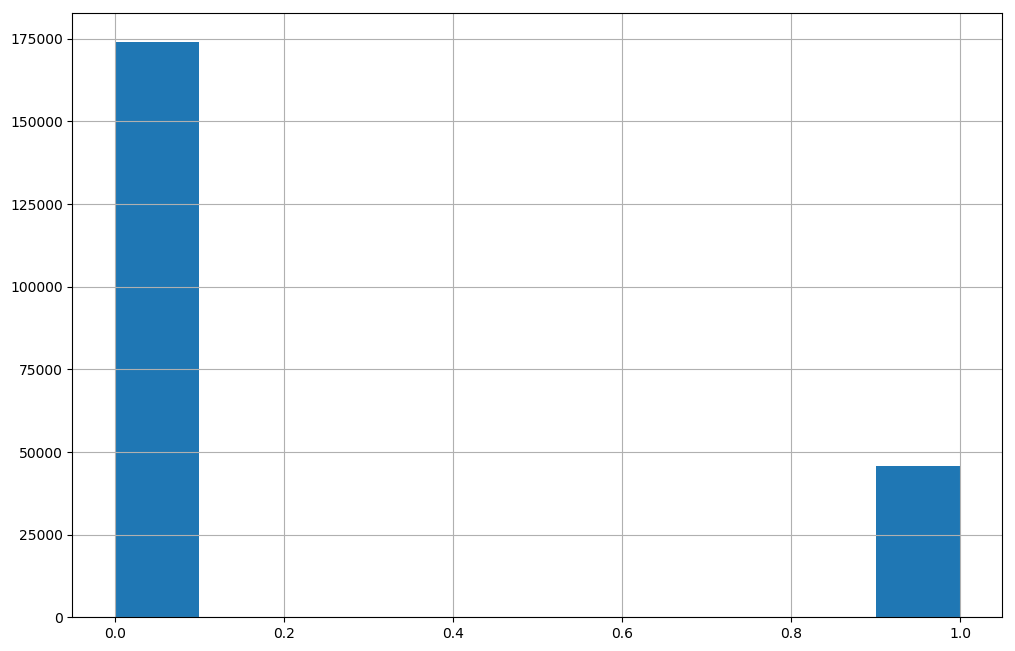

In [66]:
df.Tacking.hist()

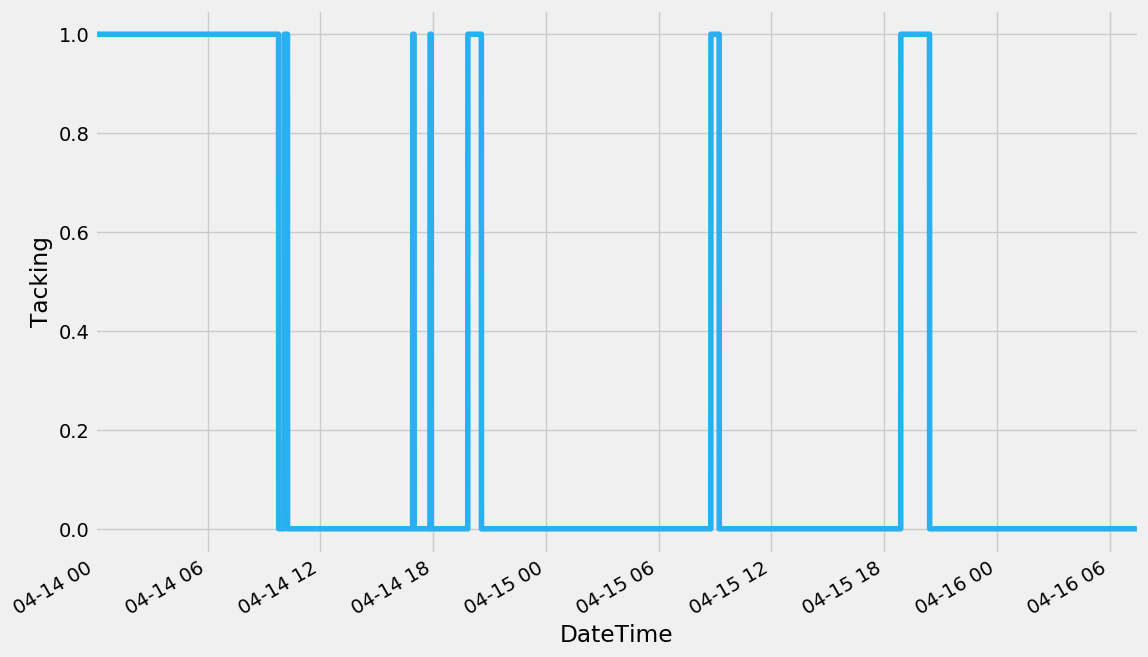

In [67]:
with plt.style.context('fivethirtyeight'):

    ax = df.Tacking.plot(color="#29B0F0")
    
    ax.set_ylabel("Tacking")
    
    plt.savefig('TackingTimeSeries.png', dpi=300, bbox_inches='tight')

In [68]:
tacking_times = []

counter = 0 

for i in range(len(df)):
    
    if df.Tacking[i] == 1: 
        
        counter += 1 
        
    else:
        
        if df.Tacking[i-1] == 1: 
        
            tacking_times.append(counter)
            counter = 0
        

In [69]:
print(np.round(np.asarray(tacking_times)/60,2))
print(round(np.mean(tacking_times)/60, 2))

[586.67  10.     2.05   4.    43.33  26.67  92.  ]
109.25


In [90]:
degrees_columns = ["CurrentDir", "TWA", "AWA", "Roll", "Pitch", "HeadingMag", "HoG", "HeadingTrue",
                  "RudderAng", "Leeway", "TWD", "Yaw"]

num_columns = list(set(df.columns) - set(degrees_columns) - set(["Latitude", "Longitude"]))

In [91]:
resampled_df = df.resample("10S").median()
resampled_df.dropna(inplace=True)
resampled_df.head()
resampled_df.isna().sum()

CurrentSpeed    0
CurrentDir      0
TWS             0
TWA             0
AWS             0
AWA             0
Roll            0
Pitch           0
HeadingMag      0
HoG             0
HeadingTrue     0
AirTemp         0
Longitude       0
Latitude        0
SoG             0
SoS             0
AvgSoS          0
VMG             0
RudderAng       0
Leeway          0
TWD             0
WSoG            0
VoltageDrawn    0
ModePilote      0
Yaw             0
Tacking         0
dtype: int64

In [92]:
resampled_df.head()

CurrentSpeed  CurrentDir    TWS   TWA   AWS   AWA  Roll  \
DateTime                                                                       
2019-04-14 00:00:00        0.0756       123.0  10.80  48.0  10.4  48.0 -3.50   
2019-04-14 00:00:10        0.0756       123.0  10.80  48.0  10.4  48.0 -3.33   
2019-04-14 00:00:20        0.0756       123.0  10.70  48.0  10.5  48.0 -3.05   
2019-04-14 00:00:30        0.0648       122.5  10.70  48.0  10.5  47.5 -2.92   
2019-04-14 00:00:40        0.0648       117.0   9.05  57.5   8.9  63.5 -2.80   

                        Pitch  HeadingMag    HoG  ...  AvgSoS     VMG  \
DateTime                                          ...                   
2019-04-14 00:00:00  9.099999        24.0  306.5  ...  0.0864  0.0594   
2019-04-14 00:00:10  9.170000        24.0  309.0  ...  0.0864  0.0702   
2019-04-14 00:00:20  9.240000        24.0  322.0  ...  0.0864  0.0702   
2019-04-14 00:00:30  9.280000        24.0   55.0  ...  0.0864  0.0675   
2019-04-14 00:00:40  9.270000        24.0   35.5  ...  0.0810  0.0297   

                     RudderAng  Leeway    TWD   WSoG  VoltageDrawn  \
DateTime                                                             
2019-04-14 00:00:00   4.666667     0.0  354.5  10.20          11.8   
2019-04-14 00:00:10   4.666667     0.0  356.0  10.40          11.8   
2019-04-14 00:00:20   4.666667     0.0   10.0  10.90          11.8   
2019-04-14 00:00:30   4.666667     0.0   53.0  10.20          11.9   
2019-04-14 00:00:40   4.666667     0.0   82.5   8.55          12.0   

                     ModePilote    Yaw  Tacking  
DateTime                                         
2019-04-14 00:00:00         5.0 -297.5      1.0  
2019-04-14 00:00:10         5.0 -300.0      1.0  
2019-04-14 00:00:20         5.0 -313.0      1.0  
2019-04-14 00:00:30         5.0  -47.0      1.0  
2019-04-14 00:00:40         5.0  -27.0      1.0  

[5 rows x 26 columns]

In [93]:
from scipy import stats

corr_list = {}
y = resampled_df['Tacking'].astype(float)
for column in resampled_df:
    x = resampled_df[column].astype(float)
    corr = stats.pointbiserialr(x, y)
    corr_list[column] = corr 
print(corr_list)

{'CurrentSpeed': PointbiserialrResult(correlation=-0.3874871191196221, pvalue=0.0), 'CurrentDir': PointbiserialrResult(correlation=0.43069959742586283, pvalue=0.0), 'TWS': PointbiserialrResult(correlation=-0.38600725934861346, pvalue=0.0), 'TWA': PointbiserialrResult(correlation=0.12438112725815961, pvalue=9.991801186025421e-70), 'AWS': PointbiserialrResult(correlation=-0.6293179655225296, pvalue=0.0), 'AWA': PointbiserialrResult(correlation=0.37605911159625144, pvalue=0.0), 'Roll': PointbiserialrResult(correlation=0.6590347281204116, pvalue=0.0), 'Pitch': PointbiserialrResult(correlation=0.5607515558193198, pvalue=0.0), 'HeadingMag': PointbiserialrResult(correlation=0.18894360808478156, pvalue=5.394603950111007e-160), 'HoG': PointbiserialrResult(correlation=0.5524242393631001, pvalue=0.0), 'HeadingTrue': PointbiserialrResult(correlation=0.07675750208171017, pvalue=1.6658704092987375e-27), 'AirTemp': PointbiserialrResult(correlation=0.4744224214950035, pvalue=0.0), 'Longitude': Pointbi

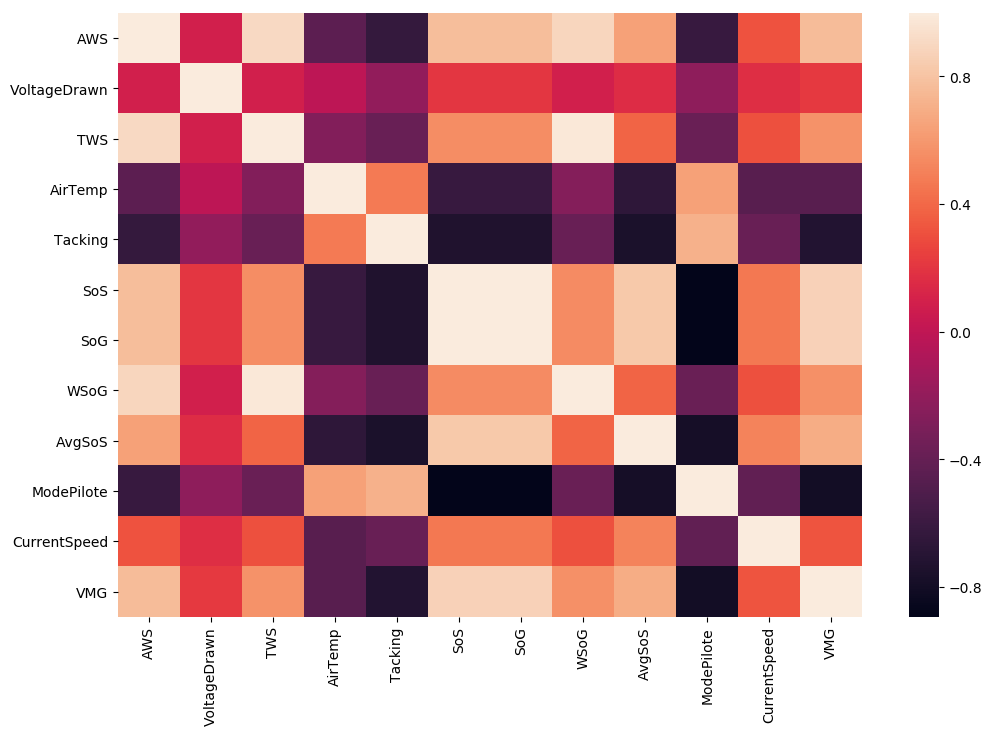

In [94]:
import seaborn as sns

sns_plot = sns.heatmap(resampled_df[num_columns].corr())

sns_plot.figure.savefig("numcolumncorr.png", dpi=100, bbox_inches='tight')

In [95]:
lag = [30, 60, 90, 180]
new_cols = []

for l in lag:
    resampled_df.loc[:,"Tacking_"+str(l)] = resampled_df["Tacking"].shift(-l)
    new_cols.append("Tacking_"+str(l))

In [96]:
resampled_df.tail()

CurrentSpeed  CurrentDir    TWS   TWA        AWS   AWA  \
DateTime                                                                      
2019-04-16 07:32:30        1.9575        95.5  14.50  58.0  20.599999  36.5   
2019-04-16 07:32:40        1.9629        97.5  14.70  60.0  20.799999  38.0   
2019-04-16 07:32:50        1.7199        94.5  14.00  61.5  19.599999  38.0   
2019-04-16 07:33:00        1.7307       101.0  14.65  59.0  20.700001  36.0   
2019-04-16 07:33:10        1.7469       101.5  15.00  58.0  21.000000  36.5   

                          Roll  Pitch  HeadingMag   HoG  ...   TWD   WSoG  \
DateTime                                                 ...                
2019-04-16 07:32:30 -16.569999   5.35        16.0  12.5  ...  70.0  14.75   
2019-04-16 07:32:40 -17.809999   6.27        17.0  13.0  ...  73.0  14.35   
2019-04-16 07:32:50 -15.900000   5.71        21.5  14.0  ...  74.5  14.70   
2019-04-16 07:33:00 -16.029999   5.65        22.0  16.0  ...  74.0  15.35   
2019-04-16 07:33:10 -17.820000   4.38        23.0  17.0  ...  75.0  15.30   

                     VoltageDrawn  ModePilote   Yaw  Tacking  Tacking_30  \
DateTime                                                                   
2019-04-16 07:32:30         12.30         2.0 -10.0      0.0         NaN   
2019-04-16 07:32:40         12.30         2.0 -11.0      0.0         NaN   
2019-04-16 07:32:50         12.30         2.0  -9.5      0.0         NaN   
2019-04-16 07:33:00         12.15         2.0 -10.0      0.0         NaN   
2019-04-16 07:33:10         12.20         2.0 -12.0      0.0         NaN   

                     Tacking_60  Tacking_90  Tacking_180  
DateTime                                                  
2019-04-16 07:32:30         NaN         NaN          NaN  
2019-04-16 07:32:40         NaN         NaN          NaN  
2019-04-16 07:32:50         NaN         NaN          NaN  
2019-04-16 07:33:00         NaN         NaN          NaN  
2019-04-16 07:33:10         NaN         NaN          NaN  

[5 rows x 30 columns]

In [97]:
# num_features_corr = resampled_df[num_columns.extend(new_cols)].corr()

num_columns.extend(new_cols)

In [98]:
num_columns

['AWS',
 'VoltageDrawn',
 'TWS',
 'AirTemp',
 'Tacking',
 'SoS',
 'SoG',
 'WSoG',
 'AvgSoS',
 'ModePilote',
 'CurrentSpeed',
 'VMG',
 'Tacking_30',
 'Tacking_60',
 'Tacking_90',
 'Tacking_180']

In [99]:
num_features_corr = resampled_df[num_columns].corr()
num_features_corr.to_csv("corr_matrix.csv")

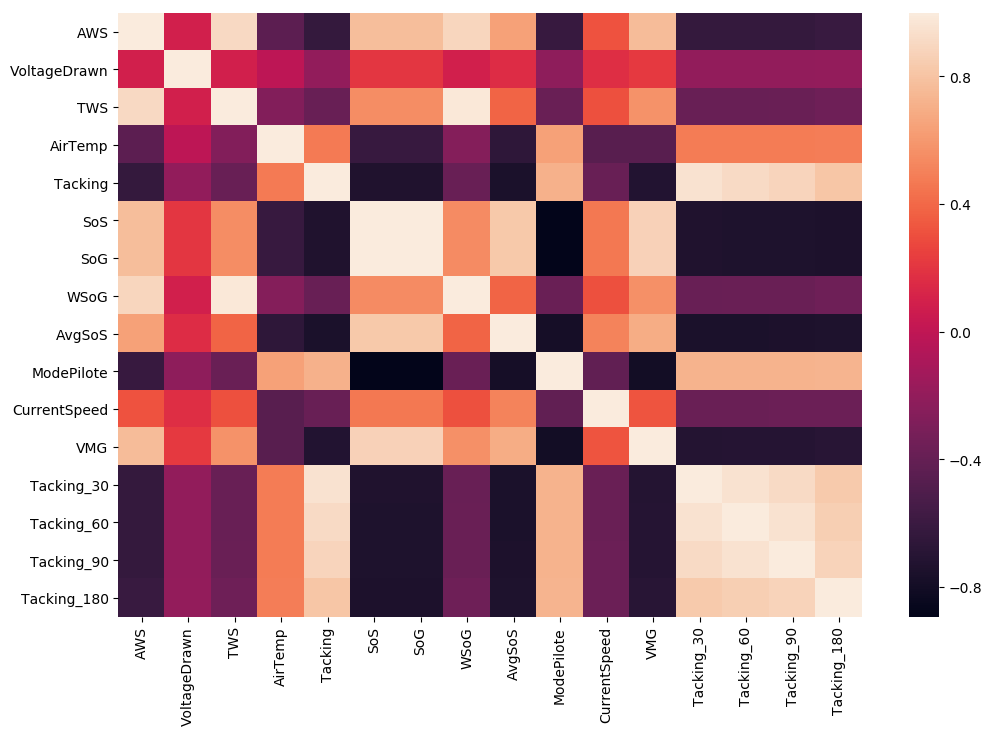

In [100]:
sns.heatmap(num_features_corr)

In [101]:

for col in num_columns:
    print(col)
    print(stats.variation(resampled_df[col]))
    coeff = stats.variation(resampled_df[col])
    variation_coefficients.append(coeff)




AWS
0.2637542228580388
VoltageDrawn
0.04527860095105422
TWS
0.23594593053282006
AirTemp
0.06725871525148971
Tacking
1.831660257340884
SoS
0.4229539108985248
SoG
0.41939748013160055
WSoG
0.24121041240796307
AvgSoS
0.48006394320392204
ModePilote
0.44031003294324694
CurrentSpeed
0.7418991429368961
VMG
0.46996607042734184
Tacking_30
nan
Tacking_60
nan
Tacking_90
nan
Tacking_180
nan


In [89]:
resampled_df["Yaw"].describe()

count    19985.000000
mean        -0.456668
std        128.974535
min       -358.500000
25%        -13.500000
50%         -5.500000
75%         -1.000000
max        357.000000
Name: Yaw, dtype: float64